In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/THESIS_Maruf/CICIDS2017_sample.csv")
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
import pandas as pd

# Load the CICIDS2017 dataset into a DataFrame
cicids_df = pd.read_csv("/content/drive/MyDrive/THESIS_Maruf/CICIDS2017_sample.csv")  # Replace "cicids2017_dataset.csv" with the actual file path

# Concatenate cicids_df with your existing DataFrame (df)
df = pd.concat([df, cicids_df], axis=1)

# Now df contains all the features from both datasets


In [ ]:
print(df.columns)


Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max',
       ...
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label'],
      dtype='object', length=156)


In [59]:

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Reset the index again after dropping NaN values
df.reset_index(drop=True, inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']


In [53]:
print(df.head)

<bound method NDFrame.head of        Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                4.0                2.0                     0.0   
1           142377.0               46.0                    62.0   
2           118873.0               23.0                    28.0   
3           143577.0               43.0                    55.0   
4           143745.0               49.0                    59.0   
...              ...                ...                     ...   
56494          234.0                2.0                     2.0   
56495       133288.0                2.0                     2.0   
56496     11507694.0                5.0                     4.0   
56497     11507707.0                8.0                     6.0   
56498     11512204.0                8.0                     5.0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                             37.0                          0.0   
1                           132

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load the data
df = pd.read_csv("/content/drive/MyDrive/THESIS_Maruf/CICIDS2017_sample.csv")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Define preprocessing steps for numerical and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Now X_preprocessed contains the preprocessed features


In [63]:
print(y)

0        BENIGN
1        BENIGN
2        BENIGN
3        BENIGN
4        BENIGN
          ...  
56656    BENIGN
56657    BENIGN
56658       DoS
56659       DoS
56660       DoS
Name: Label, Length: 56661, dtype: object


In [64]:
df.Label.value_counts()


Label
BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the Isolation Forest model on the imputed data
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X_imputed)

# Get the outlier indices
outlier_indices = clf.predict(X_imputed)

# Remove the outliers
X_no_outliers = X_imputed[outlier_indices == 1]
y_no_outliers = y[outlier_indices == 1]

# Perform SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_no_outliers, y_no_outliers)

# Display label counts after outliers removal and SMOTE
print("Label Count AFTER Outliers Removal and SMOTE:")
print(pd.Series(y_resampled).value_counts())


Label Count AFTER Outliers Removal and SMOTE:
Label
BENIGN          20454
DoS             20454
PortScan        20454
Bot             20454
Infiltration    20454
WebAttack       20454
BruteForce      20454
Name: count, dtype: int64


In [68]:
from sklearn.model_selection import train_test_split

# Assuming you have your entire dataset in X_resampled and y_resampled

# Split the data for Edge Server 1
X_train_edge1, X_remaining, y_train_edge1, y_remaining = train_test_split(X_resampled, y_resampled, train_size=1/5, random_state=42)

# Split the remaining data into equal parts for Edge Server 2, 3, and 4
X_train_edge2, X_remaining, y_train_edge2, y_remaining = train_test_split(X_remaining, y_remaining, train_size=1/4, random_state=42)
X_train_edge3, X_remaining, y_train_edge3, y_remaining = train_test_split(X_remaining, y_remaining, train_size=1/3, random_state=42)
X_train_edge4, X_test_edge4, y_train_edge4, y_test_edge4 = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# The remaining data is for the central server
X_central, X_test_edge1, y_central, y_test_edge1 = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Print the sizes of each dataset to verify
print("Edge Server 1 - X_train_edge1:", X_train_edge1.shape, "y_train_edge1:", y_train_edge1.shape)
print("Edge Server 2 - X_train_edge2:", X_train_edge2.shape, "y_train_edge2:", y_train_edge2.shape)
print("Edge Server 3 - X_train_edge3:", X_train_edge3.shape, "y_train_edge3:", y_train_edge3.shape)
print("Edge Server 4 - X_train_edge4:", X_train_edge4.shape, "y_train_edge4:", y_train_edge4.shape)
print("Central Server - X_central:", X_central.shape, "y_central:", y_central.shape)
print("Test data for Edge Server 1 - X_test_edge1:", X_test_edge1.shape, "y_test_edge1:", y_test_edge1.shape)



Edge Server 1 - X_train_edge1: (28635, 77) y_train_edge1: (28635,)
Edge Server 2 - X_train_edge2: (28635, 77) y_train_edge2: (28635,)
Edge Server 3 - X_train_edge3: (28636, 77) y_train_edge3: (28636,)
Edge Server 4 - X_train_edge4: (28636, 77) y_train_edge4: (28636,)
Central Server - X_central: (28636, 77) y_central: (28636,)
Test data for Edge Server 1 - X_test_edge1: (28636, 77) y_test_edge1: (28636,)



Feature Importance for Edge Server 1 (Random Forest):
[1.85195507e-02 1.21703489e-02 1.38783108e-02 1.90937512e-02
 1.94475137e-02 1.86161172e-02 1.87835283e-02 1.60245110e-02
 5.37123924e-03 1.55783434e-02 2.86521215e-02 2.55239407e-02
 1.10448790e-02 2.40163412e-02 1.00272333e-02 2.14082998e-02
 2.05285719e-02 1.73375349e-02 1.43487410e-02 1.72777877e-02
 1.48831684e-02 2.49591079e-02 1.99180081e-02 2.66865287e-02
 9.44867570e-03 5.82383836e-03 7.49419433e-03 6.46990911e-03
 1.39468224e-02 5.75617960e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.34497851e-02 1.68307132e-02 9.26393589e-03
 3.51712798e-02 1.59101222e-02 2.33186752e-02 3.15396539e-02
 1.51425950e-02 2.01624428e-02 3.35402772e-04 3.52381261e-03
 0.00000000e+00 1.29274276e-02 7.95965095e-03 6.87047497e-03
 0.00000000e+00 0.00000000e+00 3.10250803e-03 2.88542894e-02
 1.82293739e-02 2.14483380e-02 1.05791963e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.15633711e-02

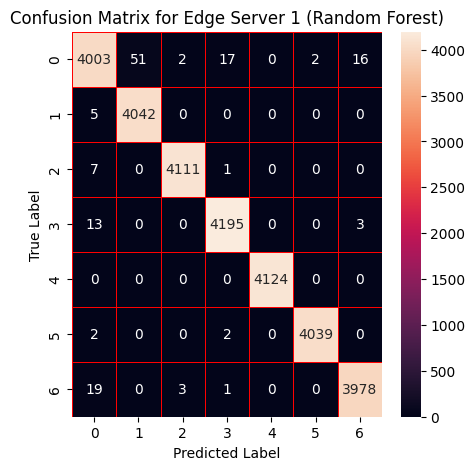

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Define weight for Edge Server 1
weight_edge1 = 0.5  # Assign a weight based on server performance or any other criterion

# Define hyperparameter grid for Random Forest
param_grid_edge1_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_edge1_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_edge1_rf, cv=5, n_jobs=-1)

# Perform hyperparameter tuning using GridSearchCV
grid_search_edge1_rf.fit(X_train_edge1, y_train_edge1)

# Get the best parameters and model for Edge Server 1
best_params_edge1_rf = grid_search_edge1_rf.best_params_
best_model_edge1_rf = grid_search_edge1_rf.best_estimator_

# Save the best model and feature importance for Edge Server 1
with open('best_model_edge1_rf.pickle', 'wb') as f_best_edge1_rf:
    pickle.dump(best_model_edge1_rf, f_best_edge1_rf)

# Extracting feature importance for Edge Server 1
feature_importance_edge1_rf = best_model_edge1_rf.feature_importances_

# Save the extracted parameters along with the weight as a pickle file for Edge Server 1
params_to_save_edge1_rf = {'feature_importance': feature_importance_edge1_rf,
                           'best_params': best_params_edge1_rf,
                           'weight': weight_edge1}  # Include weight here

with open('rf_params_edge1.pickle', 'wb') as f_edge1_rf:
    pickle.dump(params_to_save_edge1_rf, f_edge1_rf)

# Print extracted parameters for Edge Server 1
print("\nFeature Importance for Edge Server 1 (Random Forest):")
print(feature_importance_edge1_rf)

print("\nBest Parameters for Edge Server 1 (Random Forest):", best_params_edge1_rf)
print("Weight for Edge Server 1:", weight_edge1)  # Print weight

# Train the best model on the entire training set for Edge Server 1
best_model_edge1_rf.fit(X_train_edge1, y_train_edge1)

# Predict test set results for Edge Server 1
y_pred_edge1_rf = best_model_edge1_rf.predict(X_test_edge1)

# Display classification report for Edge Server 1 (Random Forest)
print("\nClassification Report for Edge Server 1 (Random Forest):")
print(classification_report(y_test_edge1, y_pred_edge1_rf))

# Calculate confusion matrix for Edge Server 1 (Random Forest)
conf_matrix_edge1_rf = confusion_matrix(y_test_edge1, y_pred_edge1_rf)

# Visualization of confusion matrix for Edge Server 1 (Random Forest)
f_edge1_rf, ax_edge1_rf = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_edge1_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax_edge1_rf)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Edge Server 1 (Random Forest)")
plt.show()



Classification Report for Edge Server 1 (Random Forest):
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.98      4091
         Bot       0.99      1.00      0.99      4047
  BruteForce       1.00      1.00      1.00      4119
         DoS       1.00      1.00      1.00      4211
Infiltration       1.00      1.00      1.00      4124
    PortScan       1.00      1.00      1.00      4043
   WebAttack       0.99      0.99      0.99      4001

    accuracy                           0.99     28636
   macro avg       0.99      0.99      0.99     28636
weighted avg       0.99      0.99      0.99     28636



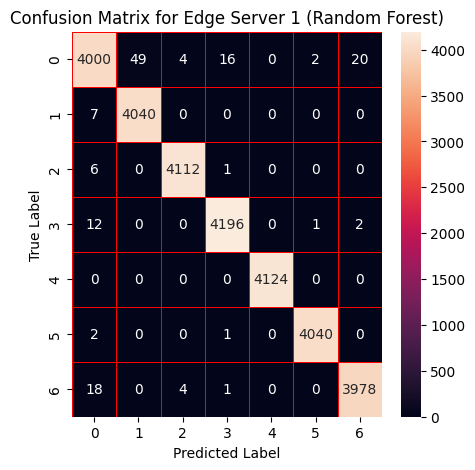

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Hyperparameter tuning for Edge Server 1 (Random Forest)
param_grid_edge1_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_edge1_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_edge1_rf, cv=5, n_jobs=-1)
grid_search_edge1_rf.fit(X_train_edge1, y_train_edge1)

# Get the best parameters and model for Edge Server 1
best_params_edge1_rf = grid_search_edge1_rf.best_params_
best_model_edge1_rf = grid_search_edge1_rf.best_estimator_

# Save the best model and feature importance for Edge Server 1
with open('best_model_edge1_rf.pickle', 'wb') as f_best_edge1_rf:
    pickle.dump(best_model_edge1_rf, f_best_edge1_rf)

# Extracting feature importance for Edge Server 1
feature_importance_edge1_rf = best_model_edge1_rf.feature_importances_

# Save the extracted parameters as a pickle file for Edge Server 1
params_to_save_edge1_rf = {'feature_importance': feature_importance_edge1_rf,
                           'best_params': best_params_edge1_rf}

with open('rf_params_edge1.pickle', 'wb') as f_edge1_rf:
    pickle.dump(params_to_save_edge1_rf, f_edge1_rf)

# Train the best model on the entire training set for Edge Server 1
best_model_edge1_rf.fit(X_train_edge1, y_train_edge1)

# Predict test set results for Edge Server 1
y_pred_edge1_rf = best_model_edge1_rf.predict(X_test_edge1)

# Display classification report for Edge Server 1 (Random Forest)
print("\nClassification Report for Edge Server 1 (Random Forest):")
print(classification_report(y_test_edge1, y_pred_edge1_rf))

# Calculate confusion matrix for Edge Server 1 (Random Forest)
conf_matrix_edge1_rf = confusion_matrix(y_test_edge1, y_pred_edge1_rf)

# Visualization of confusion matrix for Edge Server 1 (Random Forest)
f_edge1_rf, ax_edge1_rf = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_edge1_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax_edge1_rf)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Edge Server 1 (Random Forest)")
plt.show()



Classification Report for Edge Server 2 (Random Forest):
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.98      4091
         Bot       0.99      1.00      0.99      4047
  BruteForce       1.00      1.00      1.00      4119
         DoS       1.00      0.99      0.99      4211
Infiltration       1.00      1.00      1.00      4124
    PortScan       1.00      1.00      1.00      4043
   WebAttack       0.99      1.00      1.00      4001

    accuracy                           0.99     28636
   macro avg       0.99      0.99      0.99     28636
weighted avg       0.99      0.99      0.99     28636



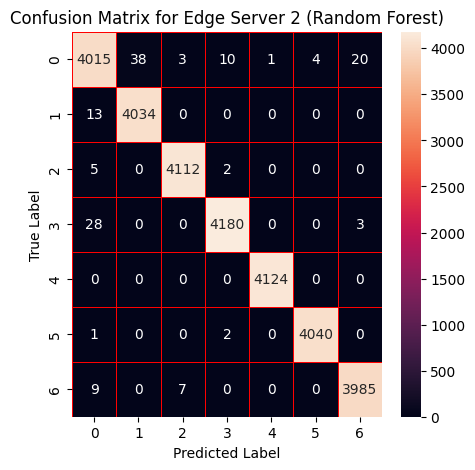

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Splitting the data for Edge Server 2
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Hyperparameter tuning for Edge Server 2 (Random Forest)
param_grid_edge2_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 4, 8]
}

grid_search_edge2_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_edge2_rf, cv=5, n_jobs=-1)
grid_search_edge2_rf.fit(X_train_edge2, y_train_edge2)

# Get the best parameters and model for Edge Server 2
best_params_edge2_rf = grid_search_edge2_rf.best_params_
best_model_edge2_rf = grid_search_edge2_rf.best_estimator_

# Define weight for Edge Server 2
weight_edge2 = 0.7  # You can adjust this weight based on performance or any other criterion

# Save the best model and feature importance along with the weight for Edge Server 2
with open('best_model_edge2_rf.pickle', 'wb') as f_best_edge2_rf:
    pickle.dump(best_model_edge2_rf, f_best_edge2_rf)

# Extracting feature importance for Edge Server 2
feature_importance_edge2_rf = best_model_edge2_rf.feature_importances_

# Save the extracted parameters along with the weight as a pickle file for Edge Server 2
params_to_save_edge2_rf = {'feature_importance': feature_importance_edge2_rf,
                           'best_params': best_params_edge2_rf,
                           'weight': weight_edge2}  # Include weight here

with open('rf_params_edge2.pickle', 'wb') as f_edge2_rf:
    pickle.dump(params_to_save_edge2_rf, f_edge2_rf)

# Train the best model on the entire training set for Edge Server 2
best_model_edge2_rf.fit(X_train_edge2, y_train_edge2)

# Predict test set results for Edge Server 2
y_pred_edge2_rf = best_model_edge2_rf.predict(X_test_edge2)

# Display classification report for Edge Server 2 (Random Forest)
print("\nClassification Report for Edge Server 2 (Random Forest):")
print(classification_report(y_test_edge2, y_pred_edge2_rf))

# Calculate confusion matrix for Edge Server 2 (Random Forest)
conf_matrix_edge2_rf = confusion_matrix(y_test_edge2, y_pred_edge2_rf)

# Visualization of confusion matrix for Edge Server 2 (Random Forest)
f_edge2_rf, ax_edge2_rf = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_edge2_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax_edge2_rf)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Edge Server 2 (Random Forest)")
plt.show()



Classification Report for Edge Server 3 (Random Forest):
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.98      4091
         Bot       0.99      1.00      0.99      4047
  BruteForce       1.00      1.00      1.00      4119
         DoS       1.00      0.99      1.00      4211
Infiltration       1.00      1.00      1.00      4124
    PortScan       1.00      1.00      1.00      4043
   WebAttack       0.99      1.00      0.99      4001

    accuracy                           0.99     28636
   macro avg       0.99      0.99      0.99     28636
weighted avg       0.99      0.99      0.99     28636



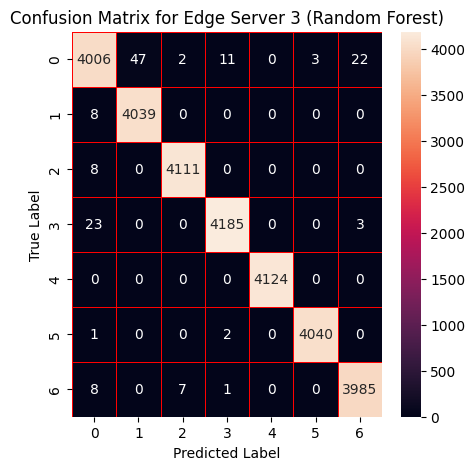

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Splitting the data for Edge Server 3
X_train_edge3, X_test_edge3, y_train_edge3, y_test_edge3 = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Hyperparameter tuning for Edge Server 3 (Random Forest)
param_grid_edge3_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [3, 6, 10]
}

grid_search_edge3_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_edge3_rf, cv=5, n_jobs=-1)
grid_search_edge3_rf.fit(X_train_edge3, y_train_edge3)

# Get the best parameters and model for Edge Server 3
best_params_edge3_rf = grid_search_edge3_rf.best_params_
best_model_edge3_rf = grid_search_edge3_rf.best_estimator_

# Define weight for Edge Server 3
weight_edge3 = 0.8  # You can adjust this weight based on performance or any other criterion

# Save the best model and feature importance along with the weight for Edge Server 3
with open('best_model_edge3_rf.pickle', 'wb') as f_best_edge3_rf:
    pickle.dump(best_model_edge3_rf, f_best_edge3_rf)

# Extracting feature importance for Edge Server 3
feature_importance_edge3_rf = best_model_edge3_rf.feature_importances_

# Save the extracted parameters along with the weight as a pickle file for Edge Server 3
params_to_save_edge3_rf = {
    'feature_importance': feature_importance_edge3_rf,
    'best_params': best_params_edge3_rf,
    'weight': weight_edge3
}  # Include weight here

with open('rf_params_edge3.pickle', 'wb') as f_edge3_rf:
    pickle.dump(params_to_save_edge3_rf, f_edge3_rf)

# Train the best model on the entire training set for Edge Server 3
best_model_edge3_rf.fit(X_train_edge3, y_train_edge3)

# Predict test set results for Edge Server 3
y_pred_edge3_rf = best_model_edge3_rf.predict(X_test_edge3)

# Display classification report for Edge Server 3 (Random Forest)
print("\nClassification Report for Edge Server 3 (Random Forest):")
print(classification_report(y_test_edge3, y_pred_edge3_rf))

# Calculate confusion matrix for Edge Server 3 (Random Forest)
conf_matrix_edge3_rf = confusion_matrix(y_test_edge3, y_pred_edge3_rf)

# Visualization of confusion matrix for Edge Server 3 (Random Forest)
f_edge3_rf, ax_edge3_rf = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_edge3_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax_edge3_rf)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Edge Server 3 (Random Forest)")
plt.show()



Classification Report for Edge Server 4 (Random Forest):
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.99      2440
         Bot       0.99      1.00      0.99      2383
  BruteForce       1.00      1.00      1.00      2497
         DoS       1.00      0.99      1.00      2556
Infiltration       1.00      1.00      1.00      2481
    PortScan       1.00      1.00      1.00      2397
   WebAttack       1.00      1.00      1.00      2428

    accuracy                           1.00     17182
   macro avg       1.00      1.00      1.00     17182
weighted avg       1.00      1.00      1.00     17182



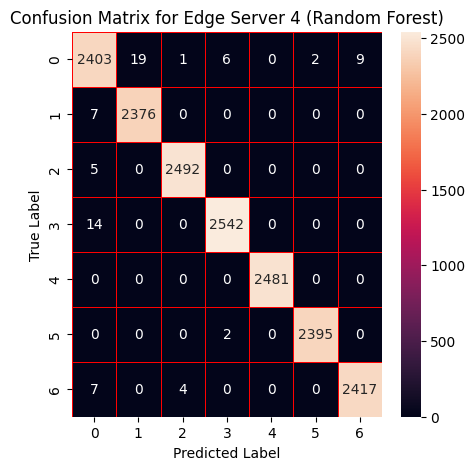

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Splitting the data for Edge Server 4 with a 70-30 train-test split ratio
X_train_edge4, X_test_edge4, y_train_edge4, y_test_edge4 = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

# Hyperparameter tuning for Edge Server 4 (Random Forest)
param_grid_edge4_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [4, 8, 10]
}

grid_search_edge4_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_edge4_rf, cv=5, n_jobs=-1)
grid_search_edge4_rf.fit(X_train_edge4, y_train_edge4)

# Get the best parameters and model for Edge Server 4
best_params_edge4_rf = grid_search_edge4_rf.best_params_
best_model_edge4_rf = grid_search_edge4_rf.best_estimator_

# Save the best model and feature importance for Edge Server 4
with open('best_model_edge4_rf.pickle', 'wb') as f_best_edge4_rf:
    pickle.dump(best_model_edge4_rf, f_best_edge4_rf)

# Extracting feature importance for Edge Server 4
feature_importance_edge4_rf = best_model_edge4_rf.feature_importances_

# Save the extracted parameters as a pickle file for Edge Server 4
params_to_save_edge4_rf = {'feature_importance': feature_importance_edge4_rf,
                           'best_params': best_params_edge4_rf}

with open('rf_params_edge4.pickle', 'wb') as f_edge4_rf:
    pickle.dump(params_to_save_edge4_rf, f_edge4_rf)

# Define weight for Edge Server 4
weight_edge4 = 0.25  # Example weight for Edge Server 4

# Train the best model on the entire training set for Edge Server 4
best_model_edge4_rf.fit(X_train_edge4, y_train_edge4)

# Predict test set results for Edge Server 4
y_pred_edge4_rf = best_model_edge4_rf.predict(X_test_edge4)

# Display classification report for Edge Server 4 (Random Forest)
print("\nClassification Report for Edge Server 4 (Random Forest):")
print(classification_report(y_test_edge4, y_pred_edge4_rf))

# Calculate confusion matrix for Edge Server 4 (Random Forest)
conf_matrix_edge4_rf = confusion_matrix(y_test_edge4, y_pred_edge4_rf)

# Visualization of confusion matrix for Edge Server 4 (Random Forest)
f_edge4_rf, ax_edge4_rf = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_edge4_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax_edge4_rf)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Edge Server 4 (Random Forest)")
plt.show()


<ipython-input-87-3bd360832c4f>:85: RuntimeWarning: Mean of empty slice
  mean_aggregated_n_estimators = np.nanmean(weighted_n_estimators)
<ipython-input-87-3bd360832c4f>:86: RuntimeWarning: Mean of empty slice
  mean_aggregated_max_depth = np.nanmean(weighted_max_depth)
<ipython-input-87-3bd360832c4f>:87: RuntimeWarning: Mean of empty slice
  mean_aggregated_min_samples_split = np.nanmean(weighted_min_samples_split)


Accuracy: 0.9855958096900916
Confusion Matrix:
 [[1501   26   22   20    0    2   10]
 [   2 1560    0    0    0    0    0]
 [   5    0 1674    1    0    0    0]
 [  11    0    0 1722    0    0    0]
 [   2    0    0    0 1683    0    0]
 [   0    0    0    0    0 1604    0]
 [   4    0   58    2    0    0 1546]]
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.98      0.95      0.97      1581
         Bot       0.98      1.00      0.99      1562
  BruteForce       0.95      1.00      0.97      1680
         DoS       0.99      0.99      0.99      1733
Infiltration       1.00      1.00      1.00      1685
    PortScan       1.00      1.00      1.00      1604
   WebAttack       0.99      0.96      0.98      1610

    accuracy                           0.99     11455
   macro avg       0.99      0.99      0.99     11455
weighted avg       0.99      0.99      0.99     11455



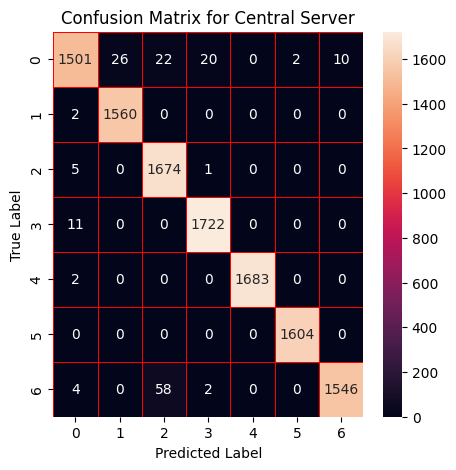

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Define weights for each edge server
weights = [weight_edge1, weight_edge2, weight_edge3, weight_edge4]

# Splitting the remaining data for the central server
X_train_central, X_test_central, y_train_central, y_test_central = train_test_split(X_remaining, y_remaining, test_size=0.2, random_state=42)

# Load parameters from Edge Server 1
with open('rf_params_edge1.pickle', 'rb') as f_edge1:
    params_edge1 = pickle.load(f_edge1)

# Load parameters from Edge Server 2
with open('rf_params_edge2.pickle', 'rb') as f_edge2:
    params_edge2 = pickle.load(f_edge2)

# Load parameters from Edge Server 3
with open('rf_params_edge3.pickle', 'rb') as f_edge3:
    params_edge3 = pickle.load(f_edge3)

# Load parameters from Edge Server 4
with open('rf_params_edge4.pickle', 'rb') as f_edge4:
    params_edge4 = pickle.load(f_edge4)

# Extract relevant parameters from each Edge Server
n_estimators_params_edge1 = params_edge1.get('n_estimators', {})
max_depth_params_edge1 = params_edge1.get('max_depth', {})
min_samples_split_params_edge1 = params_edge1.get('min_samples_split', {})
feature_importance_params_edge1 = params_edge1.get('feature_importance', {})

n_estimators_params_edge2 = params_edge2.get('n_estimators', {})
max_depth_params_edge2 = params_edge2.get('max_depth', {})
min_samples_split_params_edge2 = params_edge2.get('min_samples_split', {})
feature_importance_params_edge2 = params_edge2.get('feature_importance', {})

n_estimators_params_edge3 = params_edge3.get('n_estimators', {})
max_depth_params_edge3 = params_edge3.get('max_depth', {})
min_samples_split_params_edge3 = params_edge3.get('min_samples_split', {})
feature_importance_params_edge3 = params_edge3.get('feature_importance', {})

n_estimators_params_edge4 = params_edge4.get('n_estimators', {})
max_depth_params_edge4 = params_edge4.get('max_depth', {})
min_samples_split_params_edge4 = params_edge4.get('min_samples_split', {})
feature_importance_params_edge4 = params_edge4.get('feature_importance', {})

# Extracting values from dictionaries
n_estimators_values_edge1 = list(n_estimators_params_edge1.values())
n_estimators_values_edge2 = list(n_estimators_params_edge2.values())
n_estimators_values_edge3 = list(n_estimators_params_edge3.values())
n_estimators_values_edge4 = list(n_estimators_params_edge4.values())

max_depth_values_edge1 = list(max_depth_params_edge1.values())
max_depth_values_edge2 = list(max_depth_params_edge2.values())
max_depth_values_edge3 = list(max_depth_params_edge3.values())
max_depth_values_edge4 = list(max_depth_params_edge4.values())

min_samples_split_values_edge1 = list(min_samples_split_params_edge1.values())
min_samples_split_values_edge2 = list(min_samples_split_params_edge2.values())
min_samples_split_values_edge3 = list(min_samples_split_params_edge3.values())
min_samples_split_values_edge4 = list(min_samples_split_params_edge4.values())

# Weighted averaging of parameters
weighted_n_estimators = np.average([n_estimators_values_edge1, n_estimators_values_edge2,
                                    n_estimators_values_edge3, n_estimators_values_edge4],
                                   axis=0, weights=weights)

weighted_max_depth = np.average([max_depth_values_edge1, max_depth_values_edge2,
                                 max_depth_values_edge3, max_depth_values_edge4],
                                axis=0, weights=weights)

weighted_min_samples_split = np.average([min_samples_split_values_edge1, min_samples_split_values_edge2,
                                         min_samples_split_values_edge3, min_samples_split_values_edge4],
                                        axis=0, weights=weights)

weighted_feature_importance = np.average([feature_importance_params_edge1, feature_importance_params_edge2,
                                          feature_importance_params_edge3, feature_importance_params_edge4],
                                         axis=0, weights=weights)

# Extract mean values from aggregated arrays, handling NaN values
mean_aggregated_n_estimators = np.nanmean(weighted_n_estimators)
mean_aggregated_max_depth = np.nanmean(weighted_max_depth)
mean_aggregated_min_samples_split = np.nanmean(weighted_min_samples_split)


#Define default values for parameters if NaN error
DEFAULT_N_ESTIMATORS = 100
DEFAULT_MAX_DEPTH = 10
DEFAULT_MIN_SAMPLES_SPLIT = 5


# Check if mean values are NaN, and if so, assign default values
if np.isnan(mean_aggregated_n_estimators):
    mean_aggregated_n_estimators = DEFAULT_N_ESTIMATORS
if np.isnan(mean_aggregated_max_depth):
    mean_aggregated_max_depth = DEFAULT_MAX_DEPTH
if np.isnan(mean_aggregated_min_samples_split):
    mean_aggregated_min_samples_split = DEFAULT_MIN_SAMPLES_SPLIT

# Create a new RandomForestClassifier model and set aggregated parameters
global_model = RandomForestClassifier(n_estimators=int(mean_aggregated_n_estimators),
                                      max_depth=int(mean_aggregated_max_depth),
                                      min_samples_split=int(mean_aggregated_min_samples_split))

# Fit the model using central training data
global_model.fit(X_train_central, y_train_central)

# Predict the test set results using the central dataset
y_pred_global = global_model.predict(X_test_central)

# Evaluate the model
central_acc_global = accuracy_score(y_test_central, y_pred_global)
conf_matrix_global = confusion_matrix(y_test_central, y_pred_global)
classification_rep = classification_report(y_test_central, y_pred_global)

# Display the evaluation metrics
print("Accuracy:", central_acc_global)
print("Confusion Matrix:\n", conf_matrix_global)
print("Classification Report:\n", classification_rep)

# Visualization of confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix_global, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Central Server")
plt.show()


In [89]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Edge Server 1 (Random Forest)
accuracy_edge1_rf = accuracy_score(y_test_edge1, y_pred_edge1_rf)
print("Accuracy for Edge Server 1 (Random Forest):", accuracy_edge1_rf)

# Calculate accuracy for Edge Server 2 (Random Forest)
accuracy_edge2_rf = accuracy_score(y_test_edge2, y_pred_edge2_rf)
print("Accuracy for Edge Server 2 (Random Forest):", accuracy_edge2_rf)

# Calculate accuracy for Edge Server 3 (Random Forest)
accuracy_edge3_rf = accuracy_score(y_test_edge3, y_pred_edge3_rf)
print("Accuracy for Edge Server 3 (Random Forest):", accuracy_edge3_rf)

# Calculate accuracy for Edge Server 4 (Random Forest)
accuracy_edge4_rf = accuracy_score(y_test_edge4, y_pred_edge4_rf)
print("Accuracy for Edge Server 4 (Random Forest):", accuracy_edge4_rf)

# Make predictions for the central server model
y_pred_central_rf = global_model.predict(X_test_central)

# Calculate accuracy for Central Server (Random Forest)
accuracy_central_rf = accuracy_score(y_test_central, y_pred_central_rf)
print("Accuracy for Central Server (Random Forest):", accuracy_central_rf)



Accuracy for Edge Server 1 (Random Forest): 0.9949713647157424
Accuracy for Edge Server 2 (Random Forest): 0.9949015225590166
Accuracy for Edge Server 3 (Random Forest): 0.9949015225590166
Accuracy for Edge Server 4 (Random Forest): 0.9955767663834245
Accuracy for Central Server (Random Forest): 0.9855958096900916


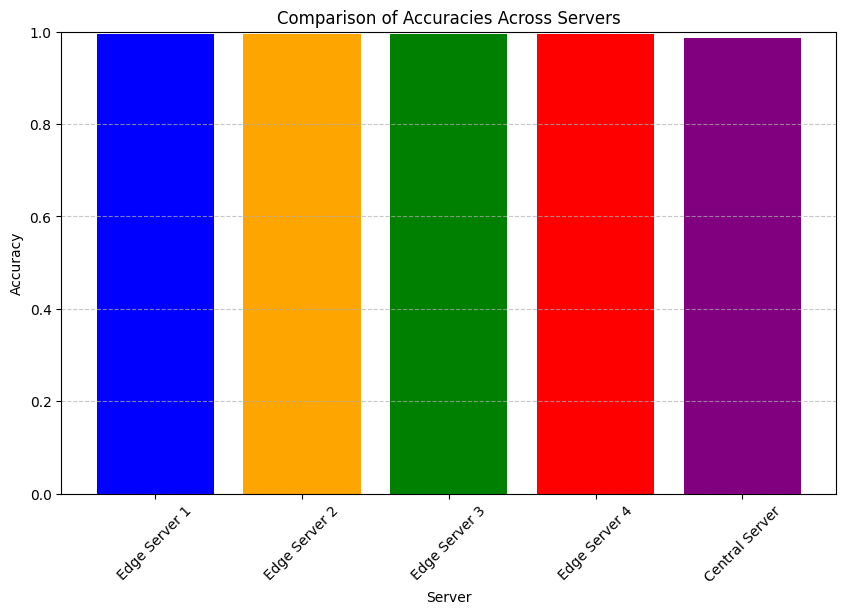

In [90]:
import matplotlib.pyplot as plt

# Define server names and corresponding accuracies
servers = ['Edge Server 1', 'Edge Server 2', 'Edge Server 3', 'Edge Server 4', 'Central Server']
accuracies = [accuracy_edge1_rf, accuracy_edge2_rf, accuracy_edge3_rf, accuracy_edge4_rf, accuracy_central_rf]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(servers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Server')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies Across Servers')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()
